<a href="https://colab.research.google.com/github/vikas2308/Scaler-Clustering/blob/main/Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

import time

In [ ]:
df = pd.read_csv('/content/scaler_clustering.csv')
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [ ]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


**Removing the unwanted column Unnamed: 0**

In [ ]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


**Shape of the loaded dataset?**

In [ ]:
df.shape

(205843, 6)

In [ ]:
print("Dimensions of dataset ",df.shape)

Dimensions of dataset  (205843, 6)


In [ ]:
df.nunique()

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64

**Checking Column Datatypes**

**Number of unique values in all non-numeric columns**

**Non-numeric columns**

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['company_hash', 'email_hash', 'job_position'], dtype='object')

**Number of unique values in all non-numeric columns**

In [ ]:
for col in cat_cols:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in company_hash: 37299
No. of unique values in email_hash: 153443
No. of unique values in job_position: 1016


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
print('Rows in the dataset: ',df.shape[0])
print('Columns in the dataset: ',df.shape[1])

Rows in the dataset:  205843
Columns in the dataset:  6


**Statistical summary**


In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [ ]:
df.describe(include='object')

,company_hash,email_hash,job_position
count,205799,205843,153279
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


**Checking for Null Values in dataset**

In [ ]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

Data contains null values in 3 columns [company_hash, orgyear, job_position].

In [ ]:
num_vars = df.select_dtypes(np.number)
num_vars.columns

Index(['orgyear', 'ctc', 'ctc_updated_year'], dtype='object')

In [ ]:
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [ ]:
df["company_hash"].nunique()

37299

In [ ]:

df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x)))
df["company_hash"].nunique()

37208

In [ ]:
df["job_position"].nunique()
# 1017 unique job positions are there in the dataset

1016

In [ ]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x)))
df["job_position"].nunique()

# 857 unique job positions are there in the dataset after preprocessing strings

856

In [ ]:
# removing the email_hash
df.drop("email_hash",axis = 1,inplace=True)

In [ ]:
df.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
118186,onvzavqa wyvqntqta mvzp,2017.0,600000,nan,2020.0
125033,ptzoyg ntwyzgrgsxto,2016.0,11800000,backend engineer,2019.0
83506,xzegojo,2017.0,850000,data analyst,2021.0
44286,onvzegqa ogwxvr xzzgcvnxgz qtcxtf,2015.0,1400000,qa engineer,2021.0
91893,vagmt,2017.0,900000,nan,2021.0


In [ ]:
df.duplicated().sum()

17598

In [ ]:
df.isna().sum()

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [ ]:
(df["company_hash"] == "").sum()

89

In [ ]:
(df["company_hash"] == "nan").sum()

44

In [ ]:
(df["job_position"] == "").sum()

9

In [ ]:
(df["job_position"] == "nan").sum()

52564

In [ ]:
# removing the records where company or job_position reocords are not available

In [ ]:
df[(df["company_hash"] == "") | (df["job_position"] == "")].sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
50358,,2020.0,720000,nan,2019.0
24039,,2021.0,100000000,other,2021.0
130329,,2019.0,700000,nan,2019.0
27141,,2020.0,350000,fullstack engineer,2021.0
87490,,2016.0,500000,fullstack engineer,2018.0
86378,,2020.0,1000000,nan,2019.0
116530,twgzztwn ogrhnxgzo uqxcvnt rxbxnta,2018.0,350000,,2021.0
23580,,2013.0,900000,nan,2021.0
2940,,2020.0,100000,nan,2020.0
86405,,2021.0,100000000,nan,2019.0


In [ ]:
len(df[(df["company_hash"] == "") | (df["job_position"] == "")])

98

In [ ]:
# df[((df["company_hash"] != "") & (df["job_position"] != ""))]

In [ ]:
df = df[~((df["company_hash"] == "") | (df["job_position"] == ""))]
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,nan,2019.0
205839,husqvawgb,2017.0,500000,nan,2020.0
205840,vwwgrxnt,2021.0,700000,nan,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


**Data Preprocessing**

In [ ]:
df["orgyear"].isna().sum()

86

imputing Employee Start Year as per the median year as per each company.

In [ ]:
df.groupby("company_hash")["orgyear"].transform("median")

0         2014.0
1         2016.0
2         2015.0
3         2016.0
4         2017.0
           ...  
205838    2018.0
205839    2017.0
205840    2016.0
205841    2020.0
205842    2015.0
Name: orgyear, Length: 205745, dtype: float64

In [ ]:
df["orgyear"].fillna(df['orgyear'].isnull().sum(),inplace=True)

In [ ]:

df["orgyear"].isna().sum()

0

In [ ]:
df.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
161197,uvjnb,2017.0,300000,backend engineer,2019.0
12439,xuogen,2018.0,660000,nan,2020.0
44857,vbvkgz,2016.0,158000,nan,2019.0
20532,xmb,2014.0,3000000,nan,2021.0
19220,ntwy bvyxzaqv,2014.0,500000,database administrator,2021.0


**Outliers Treatment :**

**employement start year**

In [ ]:
df["orgyear"].value_counts()

orgyear
2018.0    25240
2019.0    23402
2017.0    23237
2016.0    23038
2015.0    20602
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: count, Length: 78, dtype: int64

In [ ]:
colors = ['steelblue', 'salmon', 'limegreen', 'orange', 'purple', 'gold', 'skyblue', 'coral', 'lightgreen', 'lightcoral']

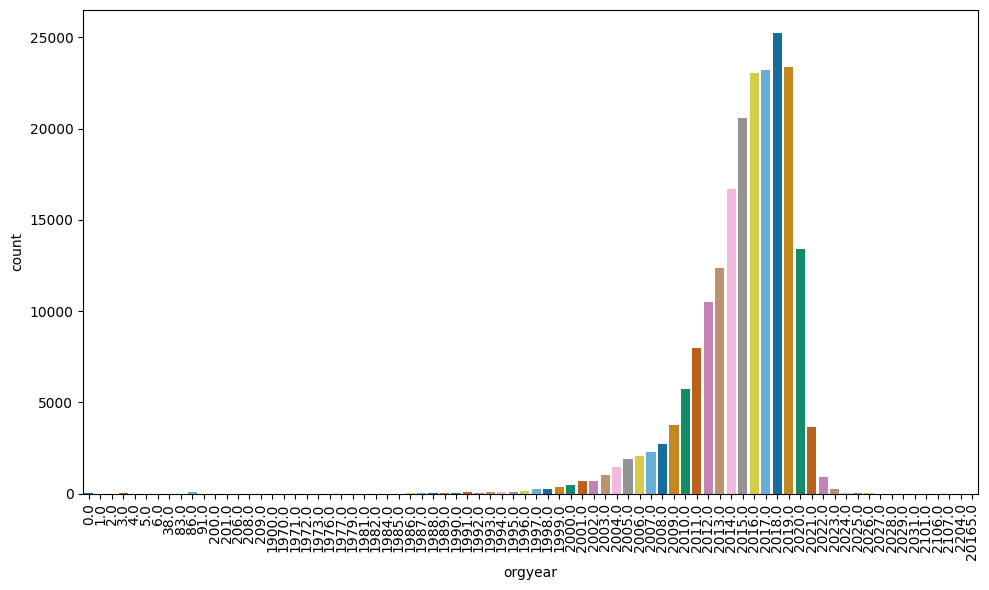

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="orgyear", data=df, palette="colorblind")
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# sns.histplot(np.log(df["orgyear"]))

In [ ]:
df["orgyear"].quantile(0.001)

1990.0

In [ ]:

df["orgyear"].quantile(0.999)

2023.0

In [ ]:
df["orgyear"] = df["orgyear"].clip(1990,2022)

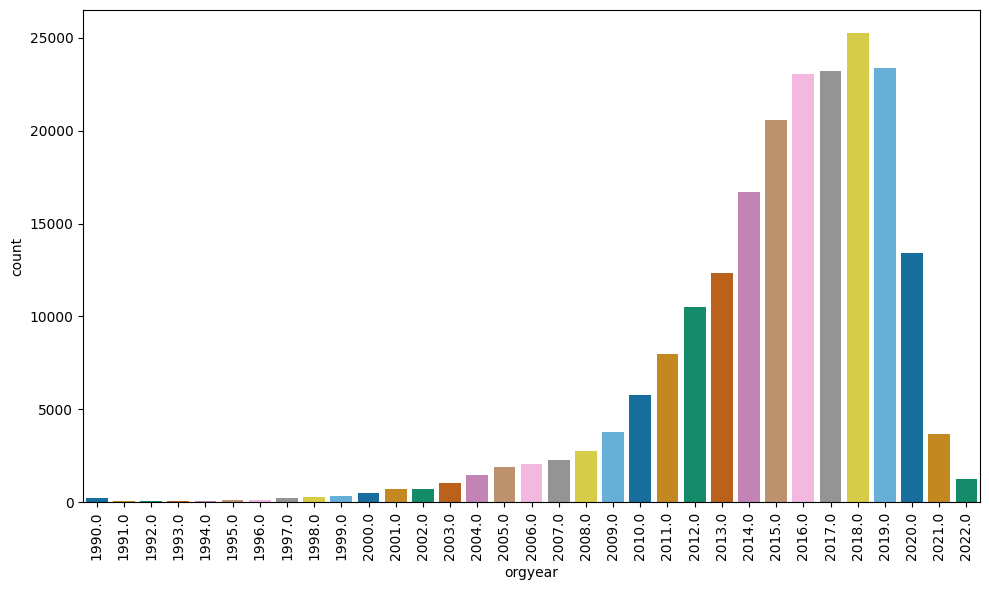

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="orgyear", data=df, palette="colorblind")
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**ctc updated_year**

In [ ]:
df["ctc_updated_year"].quantile(0.001)

2015.0

In [ ]:
df["ctc_updated_year"].quantile(0.99)

2021.0

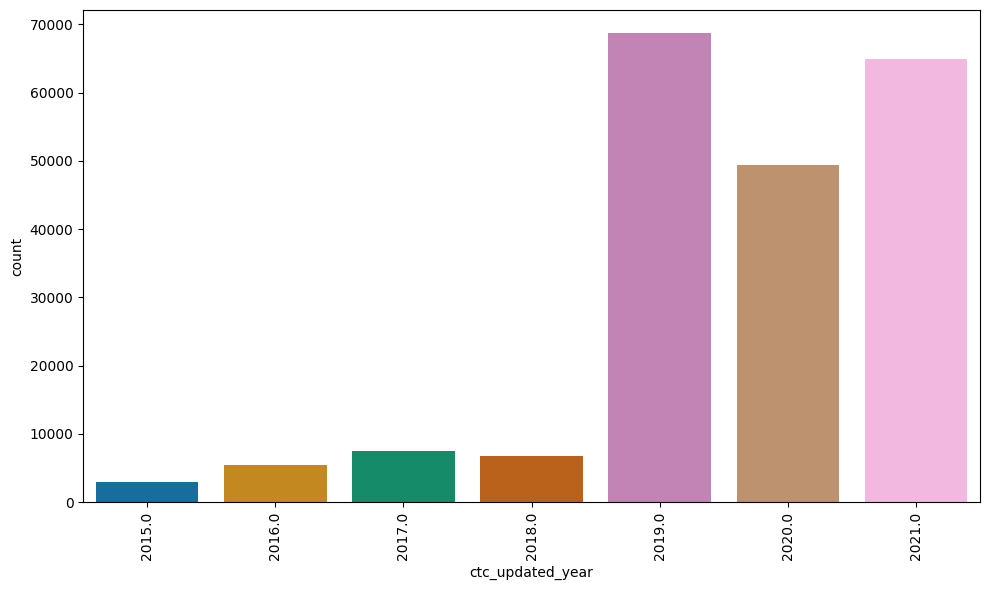

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="ctc_updated_year", data=df, palette="colorblind")
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**outlier treatment for CTC**

In [ ]:
df["ctc"].quantile(0.01)

37000.0

In [ ]:
df["ctc"].quantile(0.999)

200000000.0

In [ ]:
df = df.loc[((df.ctc) > df.ctc.quantile(0.01)) & ((df.ctc) < df.ctc.quantile(0.99))]

In [ ]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,nan,2019.0
205839,husqvawgb,2017.0,500000,nan,2020.0
205840,vwwgrxnt,2021.0,700000,nan,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


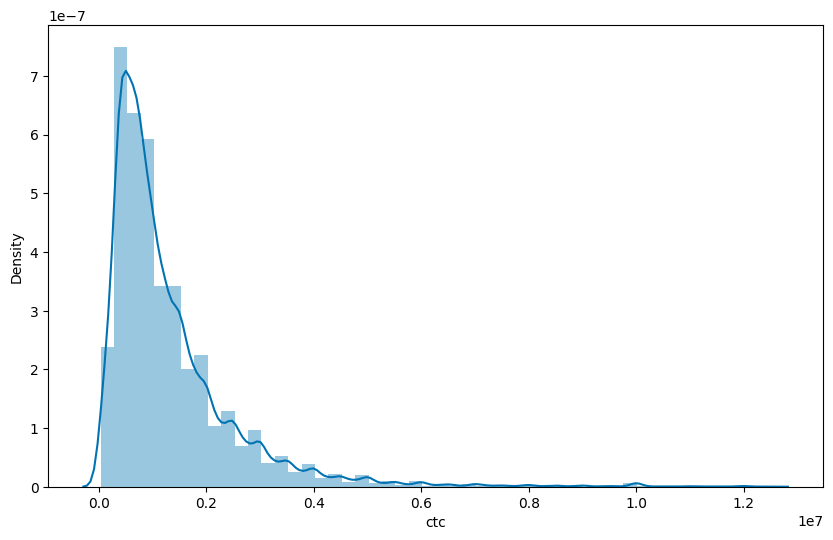

In [ ]:
sns.set_palette("colorblind")

plt.figure(figsize=(10, 6))
sns.distplot(df["ctc"])  # Use distplot with the colorblind-friendly palette
plt.show()

replacing string "nan" to np.nan

In [ ]:
df.loc[df['job_position']=='nan', 'job_position']=np.nan

In [ ]:
df.loc[df["company_hash"]=="nan","company_hash"] = np.nan

**Feature Engineering**

**Masked company name to "Others" having count less than 5**

In [ ]:
df.loc[df.groupby("company_hash")["ctc"].transform("count") < 5,"company_hash"] = "Others"

In [ ]:
(df["company_hash"] == "Others").sum()

46434

In [ ]:
# df.company_hash.value_counts(dropna=False)

In [ ]:
df['orgyear'].describe()

count    201625.000000
mean       2015.104769
std           4.256063
min        1990.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2022.000000
Name: orgyear, dtype: float64

**years of experience = current year - employement start year**

In [ ]:
# years of experience
df["years_of_experience_in_organization"] = 2023 - df["orgyear"]

In [ ]:
df.sample(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
100943,szvzxvx,2018.0,1300000,data scientist,2019.0,5.0
172187,vxqntr uvjbtzno mvzp,2018.0,750000,fullstack engineer,2019.0,5.0


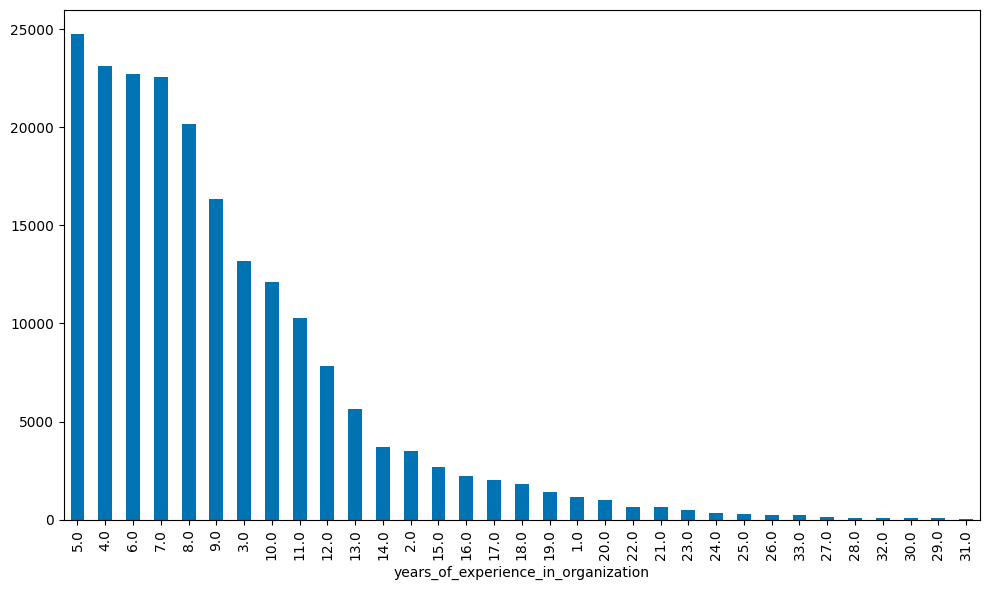

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(10, 6))
df["years_of_experience_in_organization"].value_counts().plot(kind='bar')  # Assuming df["years_of_experience_in_organization"] is categorical
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
df.duplicated().sum()

37684

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(163941, 6)

In [ ]:
df.isna().sum()

company_hash                              42
orgyear                                    0
ctc                                        0
job_position                           36746
ctc_updated_year                           0
years_of_experience_in_organization        0
dtype: int64

treating records having ctc_updated_year higher than their organization joining year

In [ ]:
# records having ctc_updated_year higher than their organization joining year
(df["ctc_updated_year"] < df["orgyear"]).sum()

7181

In [ ]:
df.ctc_updated_year = df[["ctc_updated_year","orgyear"]].max(axis = 1)

In [ ]:
(df["ctc_updated_year"] < df["orgyear"]).sum()

0

In [ ]:
df.sample(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
48331,wvustbxzx,2019.0,740000,backend engineer,2021.0,4.0
7551,gqvwrt,2012.0,800000,backend engineer,2020.0,11.0


**Filling null values with others -- if not done before**

In [ ]:
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [ ]:
df.isna().sum()

company_hash                           0
orgyear                                0
ctc                                    0
job_position                           0
ctc_updated_year                       0
years_of_experience_in_organization    0
dtype: int64

In [ ]:
df.duplicated().sum()

1061

In [ ]:
# df.drop_duplicates(inplace=True)

In [ ]:
# glacing over data after outlier treatment and preprocessing

In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization
count,163941.000000,1.639410e+05,163941.000000,163941.000000
mean,2014.772192,1.425504e+06,2019.595531,8.227808
std,4.402055,1.303987e+06,1.334961,4.402055
min,1990.000000,3.800000e+04,2015.000000,1.000000
25%,2013.000000,6.000000e+05,2019.000000,5.000000
50%,2016.000000,1.039999e+06,2020.000000,7.000000
75%,2018.000000,1.800000e+06,2021.000000,10.000000
max,2022.000000,1.250000e+07,2022.000000,33.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163941 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   company_hash                         163941 non-null  object 
 1   orgyear                              163941 non-null  float64
 2   ctc                                  163941 non-null  int64  
 3   job_position                         163941 non-null  object 
 4   ctc_updated_year                     163941 non-null  float64
 5   years_of_experience_in_organization  163941 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.8+ MB


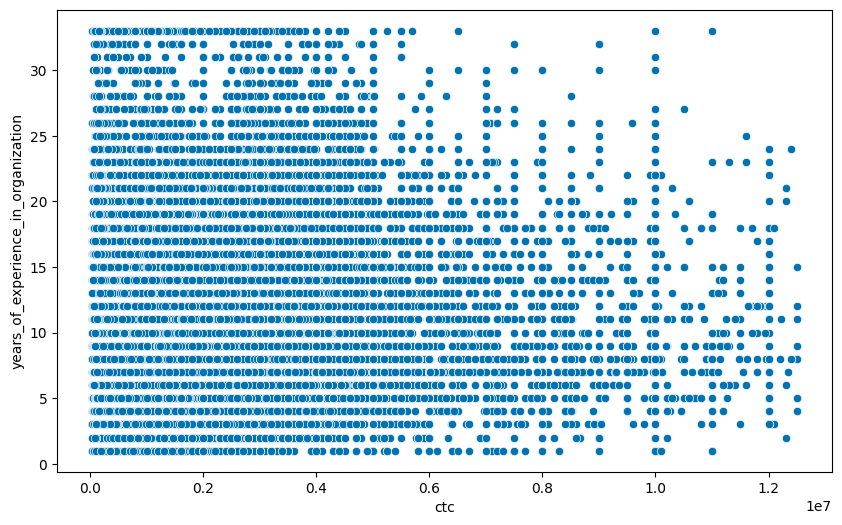

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["ctc"], y=df["years_of_experience_in_organization"])
plt.show()

In [ ]:
df.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization'],
      dtype='object')

**Manual Clustering based on Company , Job position and Years of experience**

**Learner's "designation_in_organization"**

In [ ]:
GROUPED_CTC = df.groupby(["years_of_experience_in_organization",
                                                         "job_position",
                                                         "company_hash"])["ctc"].describe()

In [ ]:
GROUPED_CTC

count  \
years_of_experience_in_organization job_position       company_hash                               
1.0                                 Others             Others                              58.0   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz        1.0   
                                                       atrgxnnt                             1.0   
                                                       atrr                                 1.0   
                                                       atrr ntwyzgrgsxto                    2.0   
...                                                                                         ...   
33.0                                qa engineer        hzxntaytvrny sqghu                   1.0   
                                                       tmxd ogenfvqt xzaxv ucn rna          1.0   
                                                       utrvnqg ogrhnxgzo ucnrna             1.0   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx    1.0   
                                    support engineer   Others                               2.0   

                                                                                                  mean  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             1.586207e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz      1.600000e+06   
                                                       atrgxnnt                           1.000000e+06   
                                                       atrr                               1.000000e+06   
                                                       atrr ntwyzgrgsxto                  1.000000e+06   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                 5.400000e+05   
                                                       tmxd ogenfvqt xzaxv ucn rna        1.220000e+06   
                                                       utrvnqg ogrhnxgzo ucnrna           6.000000e+05   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx  1.400000e+06   
                                    support engineer   Others                             3.700000e+05   

                                                                                                   std  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             2.080212e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz               NaN   
                                                       atrgxnnt                                    NaN   
                                                       atrr                                        NaN   
                                                       atrr ntwyzgrgsxto                  2.828427e+05   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                          NaN   
                                                       tmxd ogenfvqt xzaxv ucn rna                 NaN   
                                                       utrvnqg ogrhnxgzo ucnrna                    NaN   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx           NaN   
                                    support engineer   Others                             3.252691e+05   

                                            

In [ ]:
df_GROUPED_CTC_BY_E_P_C = df.merge(GROUPED_CTC,
        on = ["years_of_experience_in_organization",
              "job_position",
              "company_hash"],
        how = "left")

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163936,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
163937,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0
163938,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
163939,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0


In [ ]:
def classification(x,ctc_50,ctc_75):
    if x < ctc_50:
        return 3
    elif x >= ctc_50 and x <= ctc_75:
        return 2
    elif  x >= ctc_75:
        return 1

whichever learner has ctc compared to their years of experience , respective company , position
giving designation as 3 when ctc is < 50th percentile in his position ,experience and company
giving designation as 2 when ctc is between 50th and 75th percentile in his position ,experience and company giving designation as 1 when ctc is > 75th percentile in his position, experience and company

In [ ]:
df_GROUPED_CTC_BY_E_P_C["designation_in_organization"] = df_GROUPED_CTC_BY_E_P_C.apply(lambda x:classification(x["ctc"],x["50%"],x["75%"]),axis = 1)

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163936,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163937,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163938,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163939,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.designation_in_organization.value_counts(normalize=True)

designation_in_organization
2    0.456378
3    0.331668
1    0.211954
Name: proportion, dtype: float64

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163936,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163937,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163938,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163939,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2
...,...,...,...,...,...,...,...
163936,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2
163937,husqvawgb,2017.0,500000,Others,2020.0,6.0,3
163938,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2
163939,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.shape

(163941, 7)

Manual Clustering on company and job position
grouping by each job_position and company ,
finding which class of job an individual have,
based on his ctc compared to his job_position and respective company.

In [ ]:
GROUPED_C_J=df.groupby(['job_position','company_hash'])['ctc'].describe()
GROUPED_C_J

count  \
job_position          company_hash                                       
Others                Others                                    3520.0   
                      a ntwyzgrgsxto                               6.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0   
                      abwavnv ojontb                               1.0   
                      adw ntwyzgrgsj                              69.0   
...                                                                ...   
wordpress developer   Others                                       1.0   
worker                zgn vuurxwvmrt vwwghzn                       1.0   
x                     Others                                       1.0   
young professional ii sgctqzbtzn ge xzaxv                          1.0   
zomato                kgbvng                                       2.0   

                                                                        mean  \
job_position          company_hash                                             
Others                Others                                    1.366188e+06   
                      a ntwyzgrgsxto                            1.229167e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  5.000000e+05   
                      abwavnv ojontb                            7.000000e+05   
                      adw ntwyzgrgsj                            8.502319e+05   
...                                                                      ...   
wordpress developer   Others                                    6.000000e+05   
worker                zgn vuurxwvmrt vwwghzn                    2.000000e+05   
x                     Others                                    4.000000e+05   
young professional ii sgctqzbtzn ge xzaxv                       5.000000e+05   
zomato                kgbvng                                    3.000000e+05   

                                                                         std  \
job_position          company_hash                                             
Others                Others                                    1.445330e+06   
                      a ntwyzgrgsxto                            1.401465e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna           NaN   
                      abwavnv ojontb                                     NaN   
                      adw ntwyzgrgsj                            1.036041e+06   
...                                                                      ...   
wordpress developer   Others                                             NaN   
worker                zgn vuurxwvmrt vwwghzn                             NaN   
x                     Others                                             NaN   
young professional ii sgctqzbtzn ge xzaxv                                NaN   
zomato                kgbvng                                    2.828427e+05   

                                                                     min  \
job_position          company_hash                                         
Others                Others                                     40000.0   
                      a ntwyzgrgsxto                            350000.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0   
                      abwavnv ojontb                            700000.0   
                      adw ntwyzgrgsj                             80000.0   
...                                                                  ...   
wordpress developer   Others                                    600000.0   
worker                zgn vuurxwvmrt vwwghzn                    200000.0   
x                     Others                                    400000.0   
young professional ii sgctqzbtzn ge xzaxv                       500000.0   
zomato                kgbvng                                    100000.0   

                               

In [ ]:
df_GROUPED_C_J=df.merge(GROUPED_C_J, on=['job_position','company_hash'], how='left')

In [ ]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
78791,grv vzx ntwyzgrgsxto ucn rna,2016.0,2300000,product manager,2019.0,7.0,12.0,2.954167e+06,1.249760e+06,670000.0,2450000.0,2770000.0,3350000.0,6100000.0
31721,bgqsvz onvzrtj,2003.0,170000,fullstack engineer,2018.0,20.0,77.0,2.004039e+06,1.397728e+06,50000.0,1560000.0,1850000.0,2180000.0,12000000.0
141019,nwo zgxav,2012.0,700000,backend engineer,2020.0,11.0,1.0,7.000000e+05,NaN,700000.0,700000.0,700000.0,700000.0,700000.0
21246,ojztqkxu,2015.0,900000,other,2020.0,8.0,2.0,1.825000e+06,1.308148e+06,900000.0,1362500.0,1825000.0,2287500.0,2750000.0
49247,wgzwtznqxd,2014.0,2600000,backend engineer,2021.0,9.0,7.0,9.671429e+05,8.281448e+05,240000.0,425000.0,680000.0,1200000.0,2600000.0


In [ ]:
df_GROUPED_C_J['classs'] = df_GROUPED_C_J.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)


In [ ]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,classs
36256,zgn vuurxwvmrt vwwghzn,2016.0,350000,Others,2021.0,7.0,540.0,1.221739e+06,1.478813e+06,60000.0,400000.0,790000.0,1500000.0,10000000.0,3
62305,uvjuvr,2010.0,2100000,engineering leadership,2019.0,13.0,12.0,3.816667e+06,1.404430e+06,1400000.0,2725000.0,4100000.0,5000000.0,6000000.0,3
6302,wgszxkvzn,2015.0,600000,other,2020.0,8.0,335.0,7.108239e+05,5.114031e+05,92000.0,400000.0,600000.0,800000.0,4298000.0,2
113084,vqb,2016.0,125000,Others,2018.0,7.0,4.0,3.806250e+06,2.886490e+06,125000.0,2506250.0,4050000.0,5350000.0,7000000.0,3
49483,vbvkgz,2017.0,720000,Others,2020.0,6.0,717.0,2.059346e+06,1.599864e+06,58800.0,760000.0,1800000.0,2800000.0,11500000.0,3


In [ ]:
df_GROUPED_C_J.classs.value_counts(normalize=True)

classs
3    0.435376
2    0.320103
1    0.244521
Name: proportion, dtype: float64

In [ ]:
df_GROUPED_C_J.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)

In [ ]:
df_GROUPED_CTC_BY_E_P_C.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
Name: 0, dtype: object

In [ ]:
df_GROUPED_C_J.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
classs                                              1
Name: 0, dtype: object

In [ ]:
df_Grouped = df_GROUPED_CTC_BY_E_P_C.merge(df_GROUPED_C_J, on=['company_hash',
                                                      'orgyear',
                                                      'ctc',
                                                      'job_position',
                                                      'years_of_experience_in_organization',
                                                      'ctc_updated_year'], how='left')

In [ ]:
df_Grouped.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs
4644,ntvwy egq xzaxv,2002.0,50000,product manager,2021.0,21.0,2,2
130932,uqgpvqbv ogentwy,2015.0,700000,qa engineer,2019.0,8.0,2,1
125148,nojo,2005.0,1550000,engineering leadership,2019.0,18.0,2,3
100462,Others,2015.0,1350000,backend engineer,2020.0,8.0,2,2
32942,mvqwrvjo wgqugqvnt mvzpxzs,2014.0,1250000,frontend engineer,2019.0,9.0,1,1


In [ ]:
df_Grouped.shape

(166227, 8)

**Manual Clustering based on comapny**

based on ctc per company , assigning company as tier 1 2 and 3 per each learners

In [ ]:
GROUPED_C = df.groupby(['company_hash'])['ctc'].describe()
df_company = df.merge(GROUPED_C, on=['company_hash'], how='left')

In [ ]:
df_company.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
132177,vbtqxwvz tduqtoo,2016.0,2700000,Others,2019.0,7.0,233.0,1.730343e+06,8.698728e+05,75000.0,1210000.0,1600000.0,2010000.0,7900000.0
98751,qtwqgogen ntwyzgrgsxto,2018.0,2300000,backend architect,2019.0,5.0,13.0,1.317692e+06,5.396628e+05,700000.0,880000.0,1200000.0,1600000.0,2300000.0
131002,xwxwx mvzp,2015.0,1240000,Others,2018.0,8.0,99.0,1.040808e+06,1.314759e+06,100000.0,400000.0,600000.0,1060000.0,9000000.0
27796,wavw,2017.0,1000000,Others,2021.0,6.0,62.0,7.156451e+05,4.583886e+05,200000.0,450000.0,509999.0,1000000.0,2500000.0
109156,tcqj xzaxv,2013.0,750000,sdet,2019.0,10.0,23.0,1.062957e+06,5.672257e+05,340000.0,550000.0,1041000.0,1400000.0,2000000.0


In [ ]:
df_company['tier'] =df_company.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_company.tier.value_counts(normalize=True)

tier
3    0.477361
2    0.282913
1    0.239726
Name: proportion, dtype: float64

In [ ]:
df_company.drop(['count','mean','std','min','25%','50%','75%','max'],
               axis = 1,
               inplace=True)

In [ ]:
df_company.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
tier                                                2
Name: 0, dtype: object

In [ ]:
df_Grouped.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
classs                                              1
Name: 0, dtype: object

In [ ]:
df_Grouped = df_Grouped.merge(df_company,
                 on=['company_hash',
                     'orgyear','ctc',
                     'job_position',
                     'years_of_experience_in_organization',
                     'ctc_updated_year'
                    ])

In [ ]:
df_Grouped

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...,...,...
171310,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2,3,3
171311,husqvawgb,2017.0,500000,Others,2020.0,6.0,3,3,3
171312,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2,3,3
171313,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1,1,1


In [ ]:
X = df_Grouped.copy()

In [ ]:
X.shape

(171315, 9)

In [ ]:
X_data = X.drop(["company_hash","job_position"],axis  = 1)

**Final data for Model :**

In [ ]:
X_data

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,2016.0,1100000,2020.0,7.0,2,1,2
1,2018.0,449999,2019.0,5.0,3,3,3
2,2015.0,2000000,2020.0,8.0,1,1,1
3,2017.0,700000,2019.0,6.0,3,3,3
4,2017.0,1400000,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...
171310,2008.0,220000,2019.0,15.0,2,3,3
171311,2017.0,500000,2020.0,6.0,3,3,3
171312,2021.0,700000,2021.0,2.0,2,3,3
171313,2019.0,5100000,2019.0,4.0,1,1,1


**Standardization:**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_data)
X_sc = pd.DataFrame(scaler.transform(X_data), columns=X_data.columns, index=X_data.index)

In [ ]:
X_sc

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,0.229444,-0.238434,0.298202,-0.229444,-0.175909,-1.497119,-0.30055
1,0.680954,-0.741768,-0.452793,-0.680954,1.196397,1.001702,0.93366
2,0.003688,0.458489,0.298202,-0.003688,-1.548215,-1.497119,-1.53476
3,0.455199,-0.548177,-0.452793,-0.455199,1.196397,1.001702,0.93366
4,0.455199,-0.006126,-0.452793,-0.455199,-0.175909,-1.497119,-1.53476
...,...,...,...,...,...,...,...
171310,-1.576599,-0.919869,-0.452793,1.576599,-0.175909,1.001702,0.93366
171311,0.455199,-0.703049,0.298202,-0.455199,1.196397,1.001702,0.93366
171312,1.358221,-0.548177,1.049196,-1.358221,-0.175909,1.001702,0.93366
171313,0.906710,2.859000,-0.452793,-0.906710,-1.548215,-1.497119,-1.53476


**Hierarchical Custering :**

Trying to get a high level idea about how many clusters we can from, by taking sample of 500 learners multiple times and forming hierarchy and visualising in dendrogram.

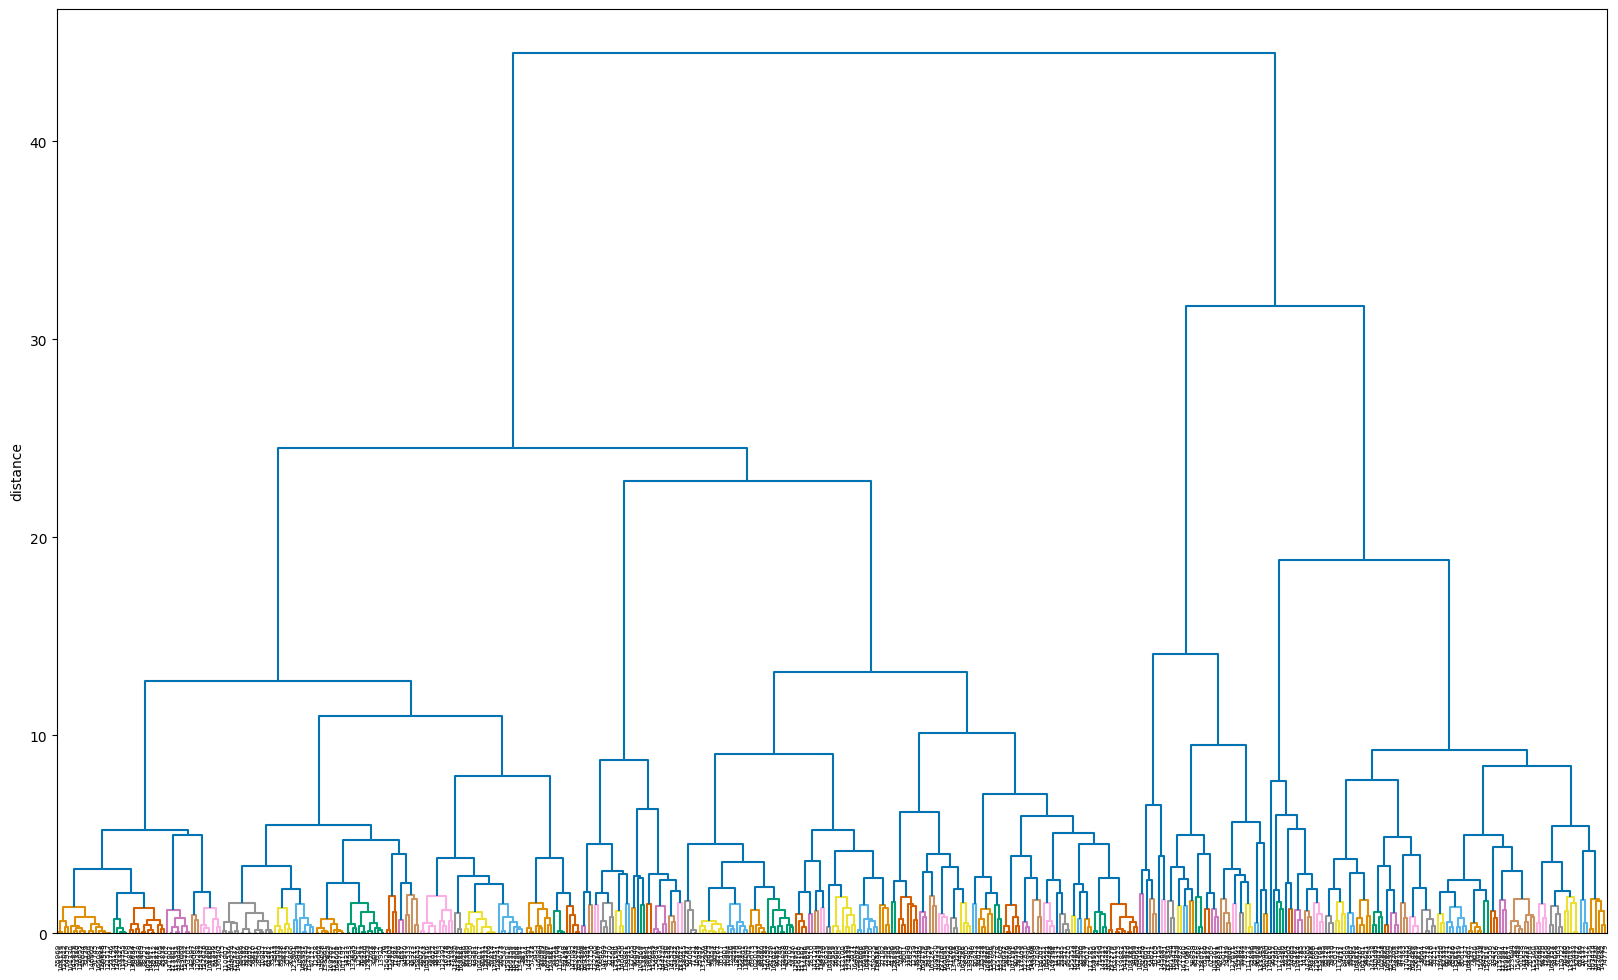

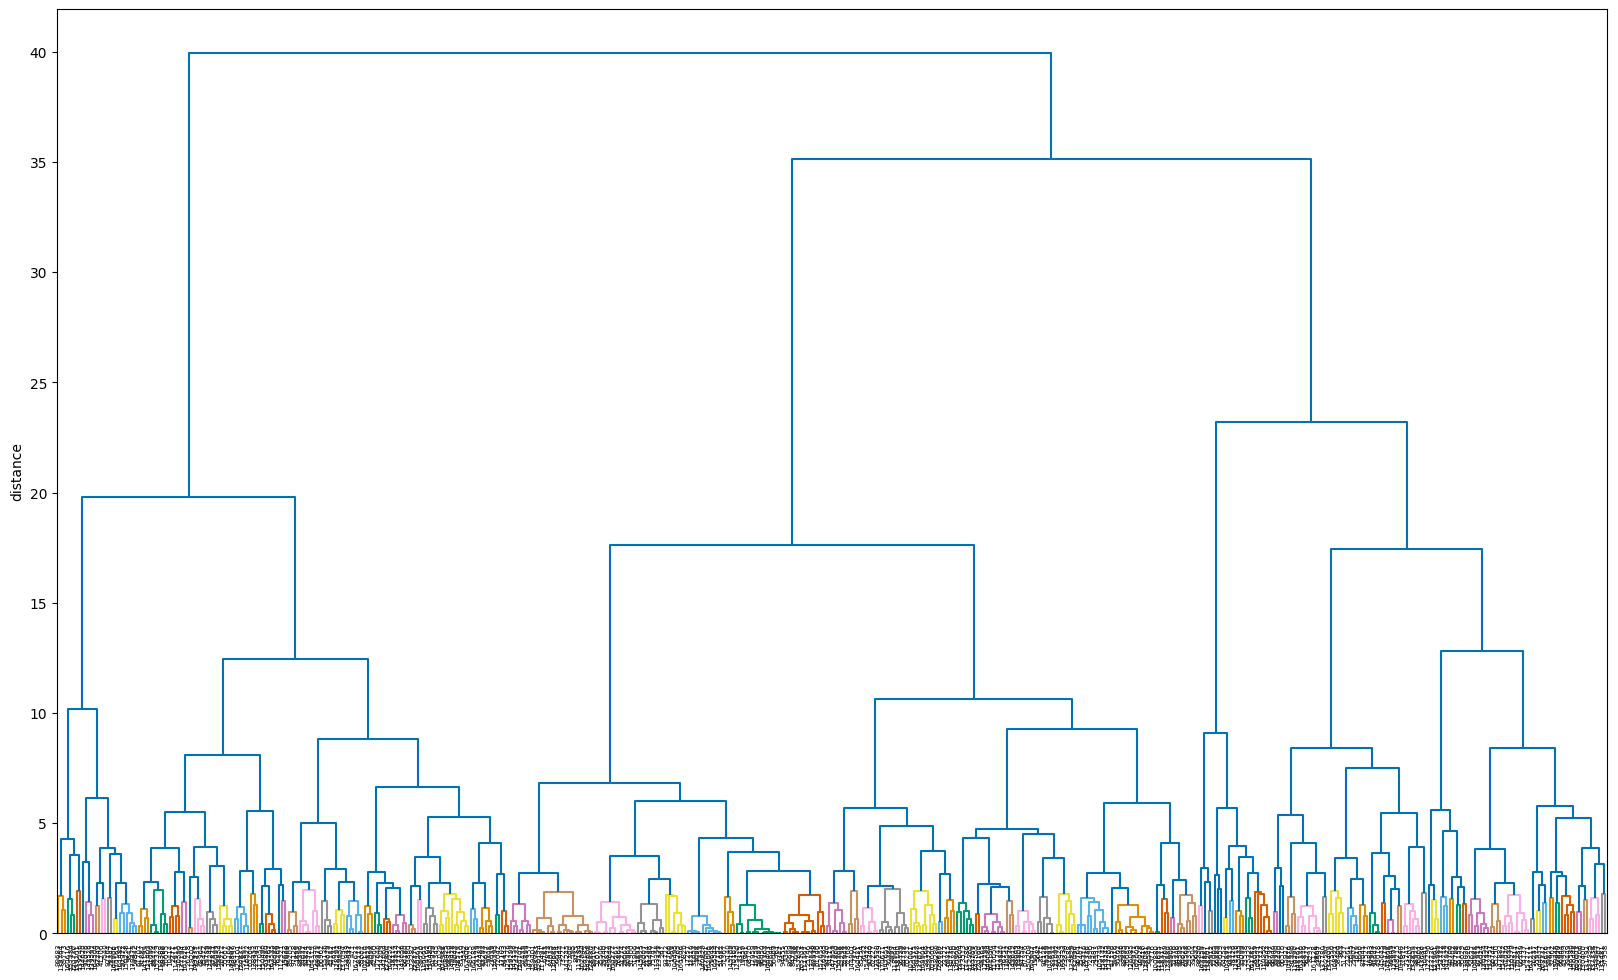

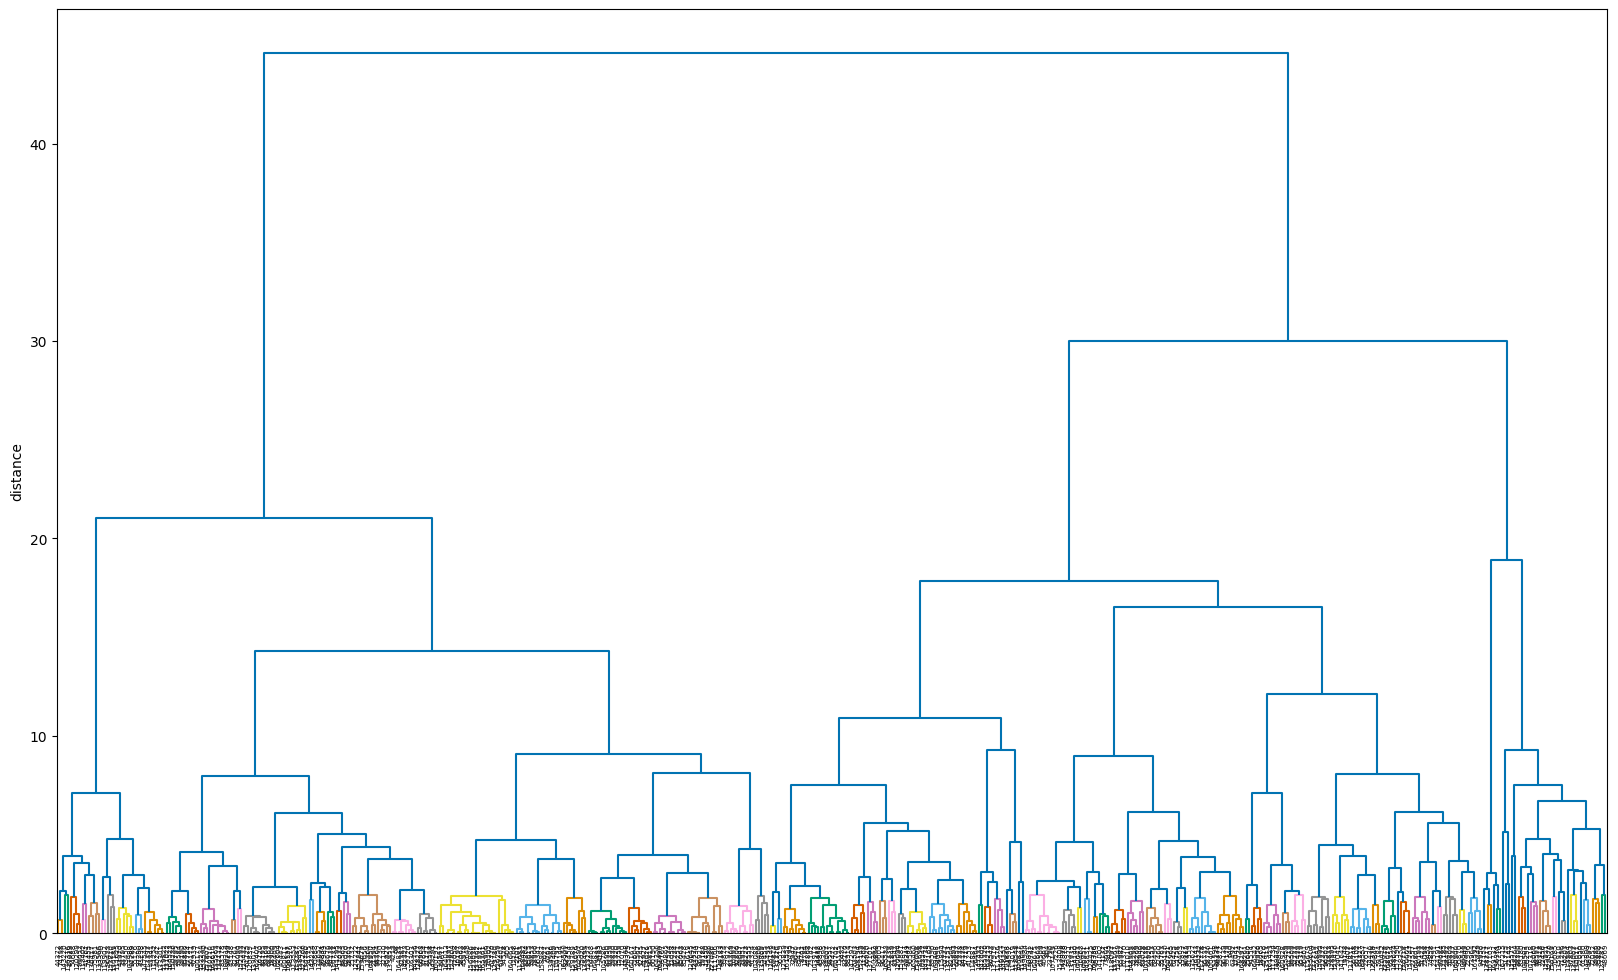

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax2 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax2.set_ylabel('distance')
plt.show()



import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax3 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax3.set_ylabel('distance')
plt.show()


Based on dendrogram , we can observe there are 3 clusters in the data based on similarity
Further checking appropriate number of clusters using Elbow Method using k-Means clustering :

**KMeans**

In [ ]:
for i in range(1,10):
    from sklearn.cluster import KMeans

    k = 4

    kM = KMeans(n_clusters=k,
               random_state=654)
    y_pred = kM.fit_predict(X_sc)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_sc)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[1199204.9999999958,
 812616.7214089881,
 663942.4988666746,
 577011.6392348548,
 517707.8522172027,
 476389.72075885686,
 439353.082017359,
 411278.461051552,
 383983.93059672095]

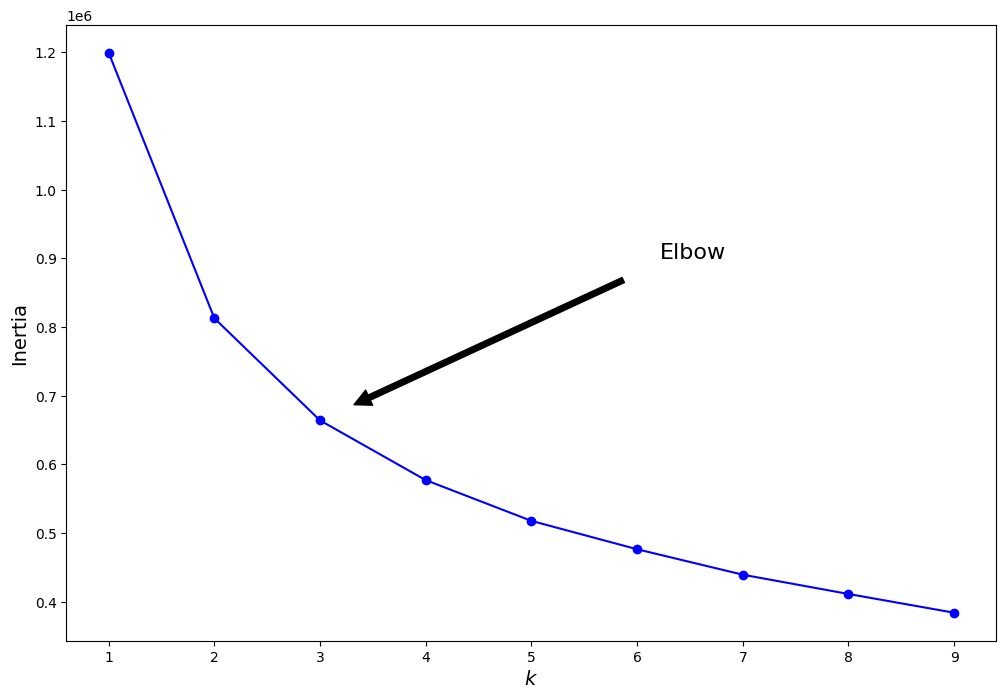

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

**KMeans with n_clusters = 3**

In [ ]:
from sklearn.cluster import KMeans

k = 3

kM = KMeans(n_clusters=k,
           random_state=654)
y_pred = kM.fit_predict(X_sc)

In [ ]:
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [ ]:
clusters.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier,label
133610,grv vzx ntwyzgrgsxto ucn rna,2015.0,860000,sdet,2016.0,8.0,3,3,3,1
40041,ozvuatvr,2013.0,1860000,backend engineer,2016.0,10.0,1,2,2,0
131759,Others,2018.0,760000,other,2021.0,5.0,2,2,3,1
98228,ygnonvq,2014.0,2000000,data scientist,2019.0,9.0,2,2,3,1
117769,wvustbxzx,2015.0,2600000,technical leader,2021.0,8.0,2,2,1,0


In [ ]:
clusters.shape

(171315, 10)

**Insights | EDA after Clustering :**

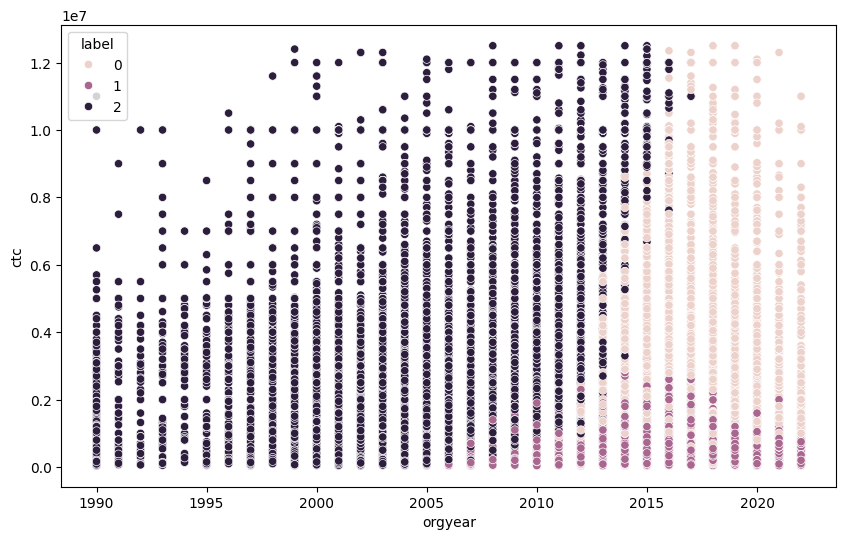

In [ ]:
sns.set_palette("colorblind")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clusters["orgyear"], y=clusters["ctc"], hue=clusters["label"])
plt.show()

2000000.0
based on above scatter plot , we can observe , a cluster of learners received CTC upto 30 LPA who joined after 2006-07.
there's a group of learners who are very much experienced.
and also learners joined after 2012-13 receiving CTC between 20 LPA to upto 1.5cr.

<Axes: xlabel='label'>

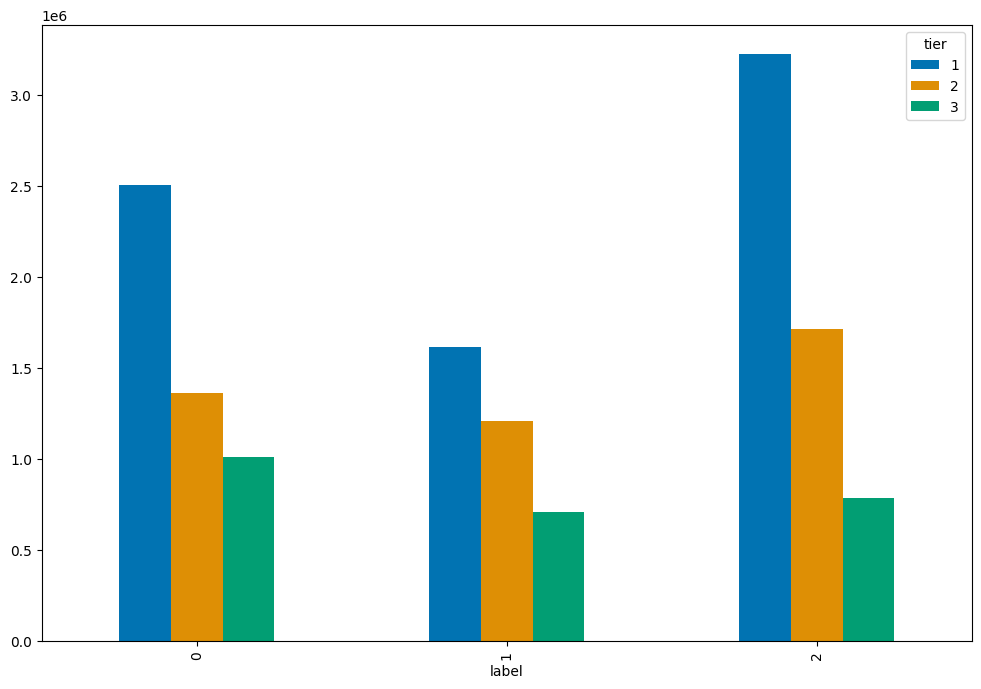

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

Based on k-Means Clustering algorithm output , as well as manual clustering , learners from tier1 company receiving very high CTC.

<Axes: xlabel='label'>

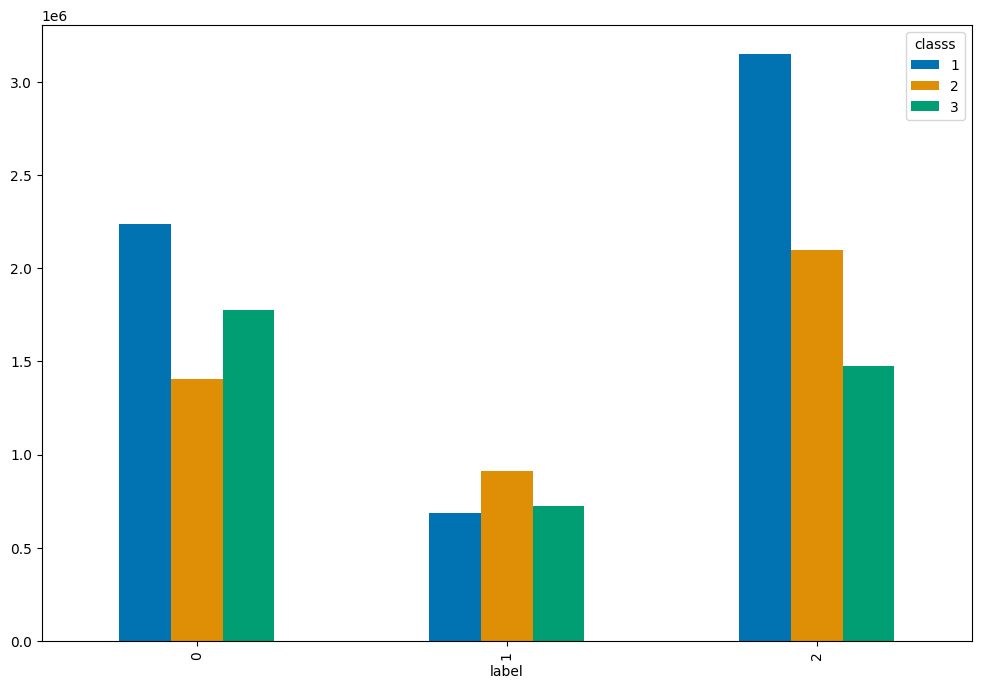

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["classs"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<Axes: xlabel='label'>

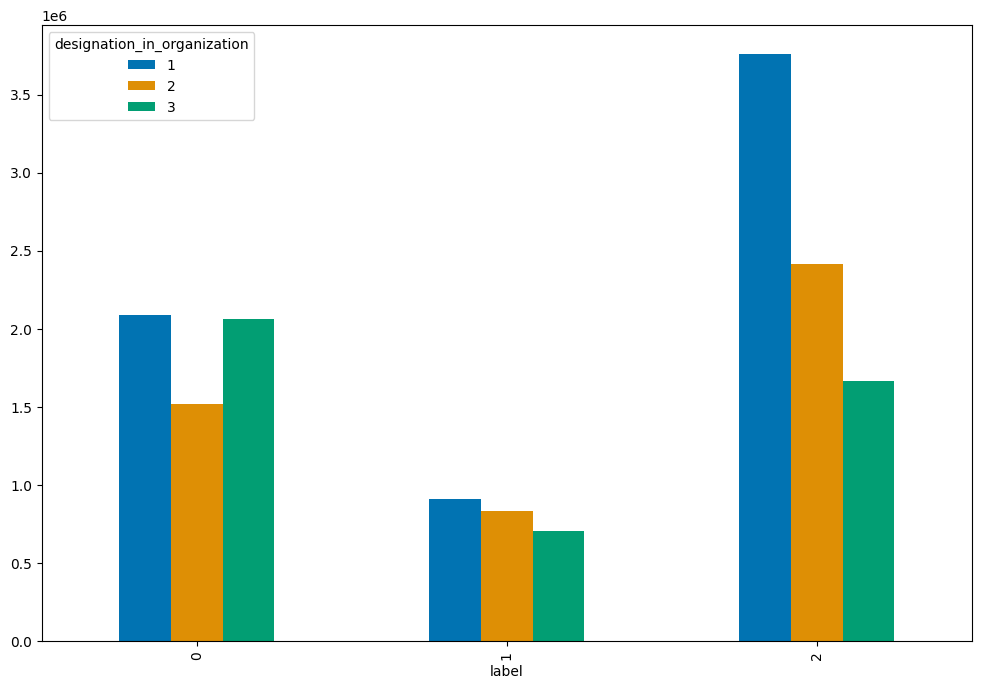

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["designation_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<Axes: xlabel='years_of_experience_in_organization'>

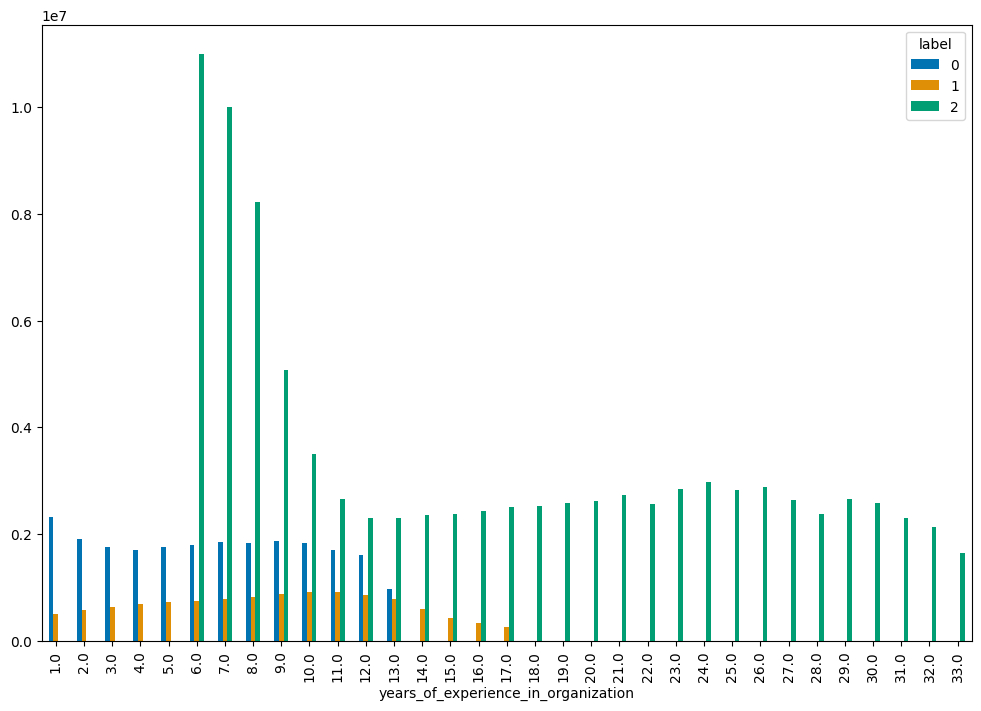

In [ ]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

Cluster label 0 , are those learners who are very very experienced,
experienced learners between 6 to 10 years of experience, earning above 40 LPA up tp 1.5Cr.

<Axes: xlabel='years_of_experience_in_organization'>

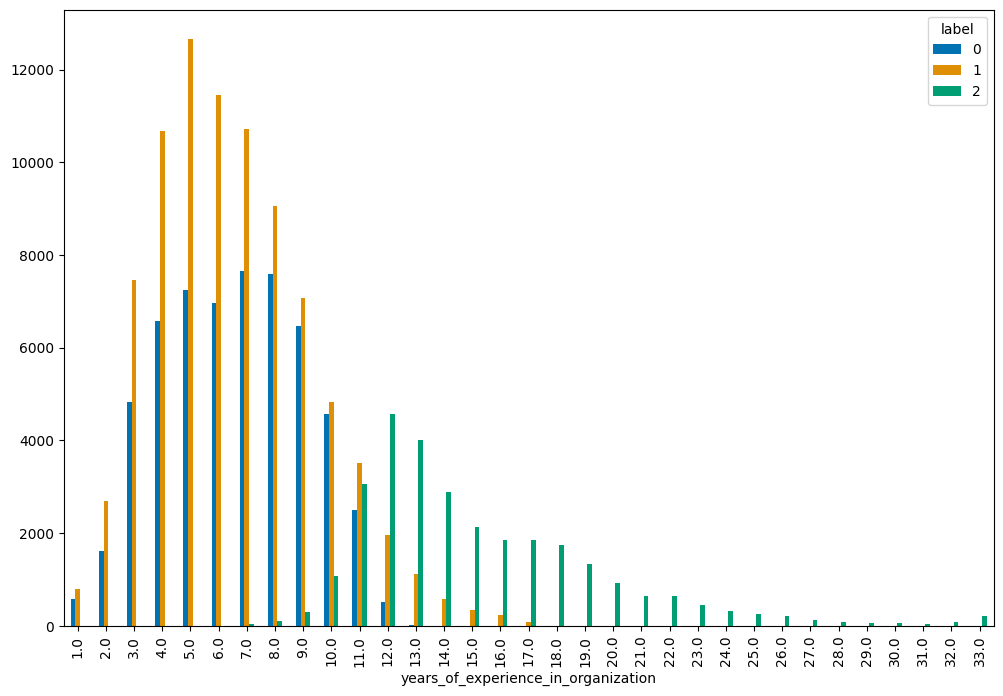

In [ ]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],

       ).plot(kind = "bar")

Majority of Learners are experienced between 1 to 15 years . (49.73%)- (Cluster 2)
there is a group of learners having 8 to upto 33 years of experience. (33%) - (Cluster 0)
16.95% of learners who have experiences - (cluster 1)

In [ ]:
clusters.label.value_counts(normalize=True)*100

label
1    49.734699
0    33.308233
2    16.957067
Name: proportion, dtype: float64

**years_of_experience_in_organization per each cluster group of learners**

<Axes: xlabel='label'>

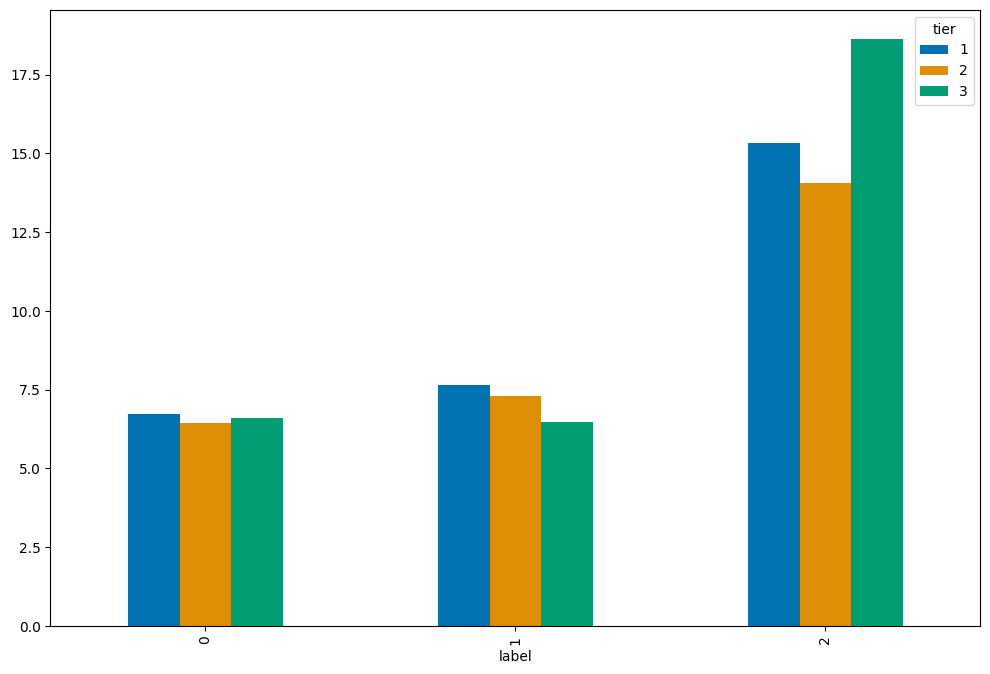

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],
            values=clusters["years_of_experience_in_organization"],
            aggfunc=np.mean
       ).plot(kind = "bar")

In [ ]:
clusters.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization', 'designation_in_organization',
       'classs', 'tier', 'label'],
      dtype='object')

**Statistical summary based on Each Cluster :**

In [ ]:
clusters.groupby("label").describe()[["ctc","classs","tier","years_of_experience_in_organization"]].T

label                                                 0             1  \
ctc                                 count  5.706200e+04  8.520300e+04   
                                    mean   1.802963e+06  7.562107e+05   
                                    std    1.272597e+06  5.033019e+05   
                                    min    6.500000e+04  3.800000e+04   
                                    25%    1.000000e+06  4.000000e+05   
                                    50%    1.500000e+06  6.300000e+05   
                                    75%    2.200000e+06  1.000000e+06   
                                    max    1.250000e+07  5.600000e+06   
classs                              count  5.706200e+04  8.520300e+04   
                                    mean   1.544583e+00  2.831191e+00   
                                    std    5.252110e-01  3.751798e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  3.000000e+00   
                                    50%    2.000000e+00  3.000000e+00   
                                    75%    2.000000e+00  3.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
tier                                count  5.706200e+04  8.520300e+04   
                                    mean   1.648750e+00  2.900731e+00   
                                    std    5.741935e-01  3.010974e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  3.000000e+00   
                                    50%    2.000000e+00  3.000000e+00   
                                    75%    2.000000e+00  3.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
years_of_experience_in_organization count  5.706200e+04  8.520300e+04   
                                    mean   6.557990e+00  6.541436e+00   
                                    std    2.474934e+00  2.775220e+00   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    5.000000e+00  4.000000e+00   
                                    50%    7.000000e+00  6.000000e+00   
                                    75%    8.000000e+00  8.000000e+00   
                                    max    1.300000e+01  1.700000e+01   

label                                                 2  
ctc                                 count  2.905000e+04  
                                    mean   2.543348e+06  
                                    std    1.751976e+06  
                                    min    3.955000e+04  
                                    25%    1.420000e+06  
                                    50%    2.100000e+06  
                                    75%    3.147500e+06  
                                    max    1.250000e+07  
classs                              count  2.905000e+04  
                                    mean   1.625886e+00  
                                    std    6.937293e-01  
                                    min    1.000000e+00  
                                    25%    1.000000e+00  
                                    50%    2.000000e+00  
                                    75%    2.000000e+00  
                                    max    3.000000e+00  
tier                                count  2.905000e+04  
                                    mean   1.484200e+00  
                                    std    6.478262e-01  
                                    min    1.000000e+00  
                                    25%    1.000000e+00  
                                    50%    1.000000e+00  
                                    75%    2.000000e+00  
                                    max    3.000000e+00  
years_of_experience_in_organization count  2.905000e+04  
                                    mean   1.520678e+01  
                        

**Insights**

Top Paying job titles include 'Engineering Leadership', 'Backend Engineer', 'Product Manager', 'Program Manager', 'SDET', 'QA Engineer', 'Data Scientist', 'Android Engineer' and 'FullStack Engineer'.

Avg CTC seems to be decreasing with year.

**Recommendations**

Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Dataa Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.

Freshers who want best CTC should aim for good companies